## 차원이 많은 데이터의 장점

In [9]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


위의 데이터는 변수가 6개이기 때문에 6차원 데이터

recency: 최근 구매일로부터 경과일
age: 나이
children: 자녀 명수
spent_all: 총 구매 금액
purchase_num_all: 총 구매 횟수
family_size: 총 가족 구성원 수


차원이 높은 데이터를 분석에 활용하면 더 많은 정보를 반영한 결과를 얻을 수 있습니다.


## 차원의 저주란?
데이터의 차원이 높아지면 좀 더 많은 정보를 나타낼 수 있지만,
오히려 데이터의 차원이 너무 많아지면 분석의 정확도가 떨어지는 현상이 발생, 이것을 차원의 저주라고 함

차원의 저주가 발생하는 상황을 직접 확인하기 위해 user 데이터의 클러스터링 결과를 차원의 수에 따라 비교
6차원 데이터로 클러스터 개수 k를 1부터 9까지 바꿔가며 모델을 학습시킨 결과의 성능 지표인 inertia를 시각화한 그래프

<Axes: >

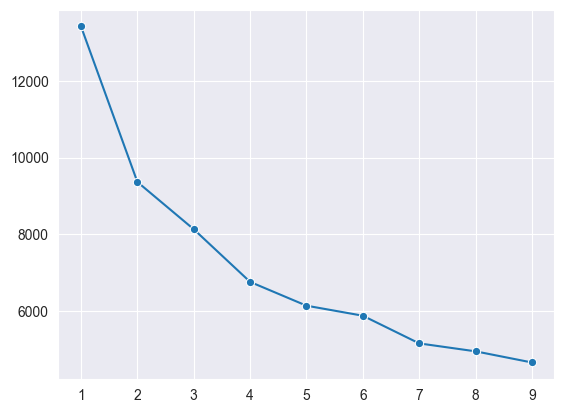

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(user)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
    
# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

<Axes: >

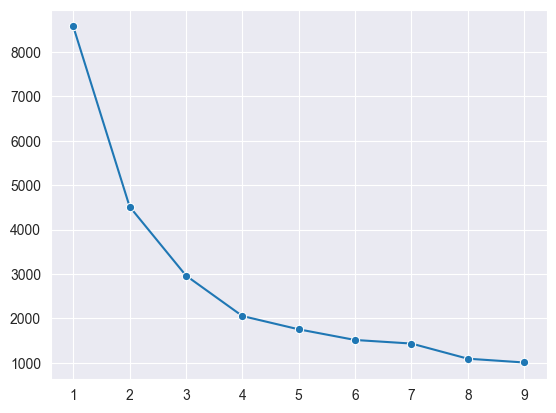

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #n_components : 유지할 차원의 갯수

# PCA적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df_pca)
    inertias.append(model.inertia_)
    
# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

두 그래프를 비교해 보면, 차원이 2개인 데이터로 클러스터링 한 결과가 
차원이 6개인 데이터로 클러스터링 한 결과보다 모든 클러스터 개수 k에서 inertia 값이 작은 것을 알 수 있다. 
즉, 차원의 개수가 더 작을수록 클러스터링의 결과로 모인 데이터들이 더 많이 유사하고, 성능이 좋게 나온다.

차원 축소에는 크게 두 가지 접근법
1. 차원 선택
2. 차원 추출

## 차원 선택
-- 첫 번째는 전체 차원 중 의미 있다고 판단되는 것들만 선택해서 사용하는 차원 선택이란 방법

In [12]:
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


자녀가 있는 집은 가족 구성원수가 더 많으므로 의미상 죽보되는 경우 두 변수중 하나를 선택하여 제거

In [13]:
user = user.drop('children', axis=1)
user.head(10)

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3
5,16,56,716,22,3
6,34,52,590,21,2
7,32,38,169,10,3
8,19,49,46,6,3
9,68,73,49,2,4


변수들 간의 관계를 통해 덜 중요하거나 불필요한 변수를 찾아 데이터에서 빼는 작업을 차원 선택

## 차원 추출
데이터를 가장 잘 설명하는 차원을 새롭게 생성하여 차원을 줄이는 방법

1. PCA(Principal Component Analysis)
- PCA는 고차원 데이터의 특성을 최대한 잘 반영하는 축인 주성분을 찾아서 데이터를 저차원으로 투영하는 방법